In [1]:
!sudo rm -r /tmp/*
print("Finalizado")

rm: cannot remove '/tmp/ZskgA2wCAK': No such file or directory
Finalizado


In [2]:
print("A ver si muestra algo ")

A ver si muestra algo 


In [3]:
q_step=32  
predictor=2  
valores_q_step = [8,16] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
imagenes = 5

print("Repositorio vacío")
for q_step in valores_q_step:
    print("Entra en el bucle")
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/stockholm/* /tmp/{q_step}/original/   
    !mkdir /tmp/{q_step}/mcdwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/mcdwt/  
    !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/mcdwt/
    !ls /tmp/{q_step}
    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/mcdwt/ 
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo}
        for imagen in range(0,imagenes): 
            ii ="{:03d}".format(imagen)
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LH{ii}.png -o /tmp/{q_step}/{tipo}/LH{ii}.png -q $q_step  
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HL{ii}.png -o /tmp/{q_step}/{tipo}/HL{ii}.png -q $q_step  
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HH{ii}.png -o /tmp/{q_step}/{tipo}/HH{ii}.png -q $q_step
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LL{ii}.png -o /tmp/{q_step}/{tipo}/LL{ii}.png -q $q_step
        !mkdir /tmp/{q_step}/{tipo}/inversas  &&  cp /tmp/{q_step}/{tipo}/* /tmp/{q_step}/{tipo}/inversas  
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/{tipo}/inversas/ -b  
        !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/{tipo}/inversas/ -b  

Repositorio vacío
Entra en el bucle
mcdwt  original
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
Quantizing with step 8
Se ejecuta deadzone
cp: -r not specified; omitting directory '/tmp/8/deadzone/inversas'
Quantizing with step

In [4]:
!cat suma.py

Hola, esto es el constructor 
{'deadzone': [[4096, 18.08641438802083], [4096, 42.71575249565972]], 'midrise': [[4096, 18.08641438802083], [4096, 42.71575249565972]], 'midthreat': [[4096, 18.08641438802083], [4096, 42.71575249565972]]}


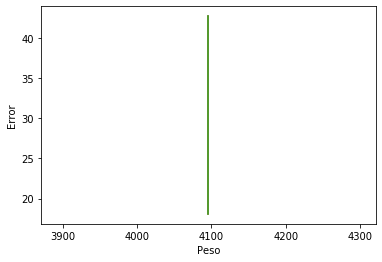

In [5]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
valores_q_step = [8,16] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
resultado_total = {"deadzone" : [] ,"midrise" : [],"midthreat":[]}
s = Sumando()
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:        
        pesos = s.GetPesos(str(tipo),q_step)
        MSE_almacenado = 0.0
        for imagen in range(0,imagenes):
            MSE_almacenado+= s.GetMSE(tipo,imagen,q_step)
        resultado_total[tipo].append([pesos,MSE_almacenado/imagenes]) 

print(resultado_total)
plt.figure()
diccionario = resultado_total
for tipo in diccionario:
    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
plt.ylabel('Error')
plt.xlabel('Peso')
plt.show()

In [6]:
from suma import Sumando
s = Sumando()
s.GetMSE("deadzone",1,8)

Hola, esto es el constructor 


19.414469740125867

In [7]:
""""
!rm /tmp/*
!cd /tmp/ && mkdir -p 8/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 16/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 32/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 64/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 128/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 256/{deadzone,midrise,midthreat,original,mcdwt,inversas}                     
!cd /tmp/ && mkdir -p 512/{deadzone,midrise,midthreat,original,mcdwt,inversas}
!cd /tmp/ && mkdir -p 700/{deadzone,midrise,midthreat,original,mcdwt,inversas}
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-f0a73111acf2>, line 11)

In [ ]:
 """"
    !cp sequences/480/*.png /tmp
!cd src/ && python3 cambiar.py
!cd src/ && python3 -O MDWT.py -p /tmp/ -N 7
!cd src/ && python3 -O MCDWT.py -P 1 -p /tmp/ -T 1 -N 6
"""

In [ ]:
""""
!ls
!python3 script_general.py 7
"""